In [26]:
#technologies
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import plotly.graph_objects as go



In [27]:
# Read the CSV file from the Resources folder 
file_path = Path("Resources/sentiment_cleaned_dataset.csv")
df_final= pd.read_csv(file_path)

# Review the DataFrame
df_final.head()


,Customer ID,Customer Name,Purchase Date,Purchase Year,Purchase Month,Product Category,Product Price,Quantity,Total Purchase Amount,Total Price,Payment Method,Returns,Gender,Customer Age,Churn
0,4625100001,Christine Hernandez,2020-09-08 09:38:00,2020,September,Electronics,12,3,740,36,Credit Card,0.0,Male,37,0
1,4625100001,Christine Hernandez,2022-03-05 12:56:00,2022,March,Home,468,4,2739,1872,PayPal,0.0,Male,37,0
2,4625100001,Christine Hernandez,2022-05-23 18:18:00,2022,May,Home,288,2,3196,576,PayPal,0.0,Male,37,0
3,4625100001,Christine Hernandez,2020-11-12 13:13:00,2020,November,Clothing,196,1,3509,196,PayPal,0.0,Male,37,0
4,1359300001,James Grant,2020-11-27 17:55:00,2020,November,Home,449,1,3452,449,Credit Card,0.0,Female,49,1


In [28]:
# Display column names
df_final.columns

Index(['Customer ID', 'Customer Name', 'Purchase Date', 'Purchase Year',
       'Purchase Month', 'Product Category', 'Product Price', 'Quantity',
       'Total Purchase Amount', 'Total Price', 'Payment Method', 'Returns',
       'Gender', 'Customer Age', 'Churn'],
      dtype='object')

In [29]:
# Duplicate the Dataframe to run the logistic regression model
df_final_logistic = df_final.copy()

## Model Training and Evaluation: Churn Prediction Using Logistic Regression

In [30]:
# 1. Prepare the data: Features (X) and Target (y)
features = ['Total Purchase Amount', 'Customer Age', 'Returns','Gender']
target = 'Churn'
X = df_final_logistic[features]  
y = df_final_logistic[target]  


In [31]:
# Encoding the 'Gender' column using one-hot encoding
X = pd.get_dummies(df_final_logistic[features], columns=['Gender'], drop_first=True)  
y = df_final_logistic[target]

In [32]:

# 2. Split the data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
# 3. Standardize the data (important for some algorithms like Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [34]:
# 4. Initialize and train the model (Logistic Regression)
model1 = LogisticRegression()
model1.fit(X_train_scaled, y_train)

LogisticRegression()

In [35]:
# 5. Make predictions on the test data
y_pred = model1.predict(X_test_scaled)

In [36]:
# 6. Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')


Accuracy: 0.8010


In [37]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{conf_matrix}')

Confusion Matrix:
[[64888     0]
 [16117     0]]


In [38]:
# Classification Report
target_names = ["Active Customers", "Churned Customers"]
class_report = classification_report(y_test, y_pred, target_names=target_names)

print("Model Accuracy:", accuracy)
print(f'\nClassification Report for Logistic Regression:\n{class_report}')

Model Accuracy: 0.8010369730263563

Classification Report for Logistic Regression:
                   precision    recall  f1-score   support

 Active Customers       0.80      1.00      0.89     64888
Churned Customers       0.00      0.00      0.00     16117

         accuracy                           0.80     81005
        macro avg       0.40      0.50      0.44     81005
     weighted avg       0.64      0.80      0.71     81005



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [39]:
# Create a gauge chart for train accuracy
fig = go.Figure()
# Calculate train accuracy
y_train_pred = model1.predict(X_train_scaled)
train_accuracy = accuracy_score(y_train, y_train_pred)


fig.add_trace(go.Indicator(
    mode="gauge+number",
    value=train_accuracy,
    title={'text': "Train Accuracy"},
    gauge={'axis': {'range': [0, 1]}, 'bar': {'color': "blue"}}
))

# Add another gauge for test accuracy
fig.add_trace(go.Indicator(
    mode="gauge+number",
    value=accuracy,
    title={'text': "Test Accuracy"},
    gauge={'axis': {'range': [0, 1]}, 'bar': {'color': "orange"}},
    domain={'x': [0.5, 1], 'y': [0, 1]}
))

fig.update_layout(
    title="Logistic Regression Model Accuracy",
    grid={'rows': 1, 'columns': 2, 'pattern': "independent"},
     width=700, 
    height=500
)
fig.write_image('output/logistic_regression(churn).png')
fig.show()

In [40]:
# import pickle to save the trained model to a pickle file
import pickle
import os

pickle.dump(model1, open(os.path.join('Models', 'churn_logisticRegression.pkl'), 'wb'), protocol=4)

print("Model saved as 'churn_logisticRegression.pkl'")


Model saved as 'churn_logisticRegression.pkl'


## Model Training and Evaluation: Churn Prediction Using Random Forest

In [41]:
# Importing new Dependencies

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [42]:
# Duplicate the Dataframe to run the random forest model
df_final_random = df_final.copy()

In [43]:
# Drop irrelevant columns
df_final_random.drop(columns=['Customer Name', 'Purchase Date', 'Purchase Year',
       'Purchase Month' 'Customer ID', 'Age'], inplace=True, errors='ignore')

In [44]:
# Define features (X) and target (y)

X = df_final_random.drop(columns=['Churn'])
y = df_final_random['Churn']

In [45]:
# Identify numeric and categorical features

numeric_features = ['Product Price', 'Total Purchase Amount', 'Customer Age', 'Quantity']
categorical_features = ['Product Category', 'Payment Method', 'Gender']

In [46]:
# Preprocessing pipeline

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ]
)

In [47]:
# Split the dataset into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
# Build the pipeline with a RandomForestClassifier

model2 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

In [49]:
# Train the model

model2.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Product Price',
                                                   'Total Purchase Amount',
                                                   'Customer Age',
                                                   'Quantity']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['Product Category',
                                                   'Payment Method',
                                                   'Gender'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [50]:
# Make predictions
y_pred = model2.predict(X_test)
y_pred_proba = model2.predict_proba(X_test)[:, 1]  # For ROC-AUC

In [51]:
# Evaluate the model

accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, target_names=target_names)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("Model Accuracy:", accuracy)
print("\nClassification Report for Random Forest:\n", classification_rep)
print("\nROC-AUC Score:", roc_auc)



Model Accuracy: 0.7915066971174619

Classification Report for Random Forest:
                    precision    recall  f1-score   support

 Active Customers       0.80      0.98      0.88     64888
Churned Customers       0.23      0.02      0.04     16117

         accuracy                           0.79     81005
        macro avg       0.51      0.50      0.46     81005
     weighted avg       0.69      0.79      0.71     81005


ROC-AUC Score: 0.5036722971714658


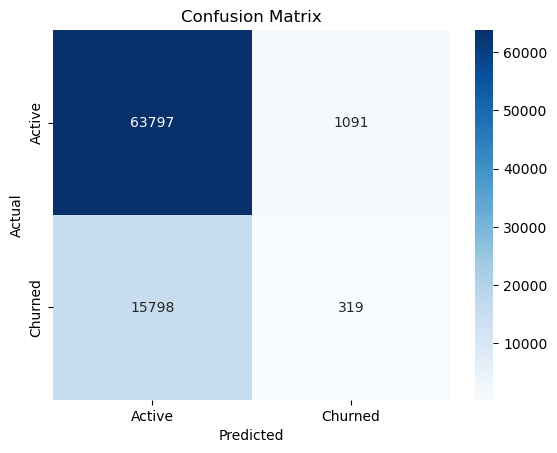

In [52]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Active', 'Churned'], yticklabels=['Active', 'Churned'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.savefig('output/confusion_matrix_churn_pred.png')
plt.show()

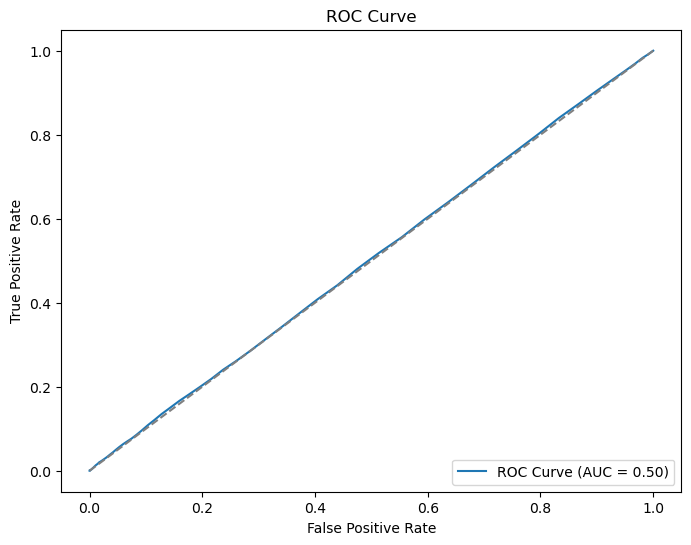

In [53]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")

plt.savefig('output/ROC_curve(churn).png')
plt.show()

/var/folders/88/s9w214wx7036sclkp3xhfnh40000gn/T/ipykernel_20339/3444078570.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




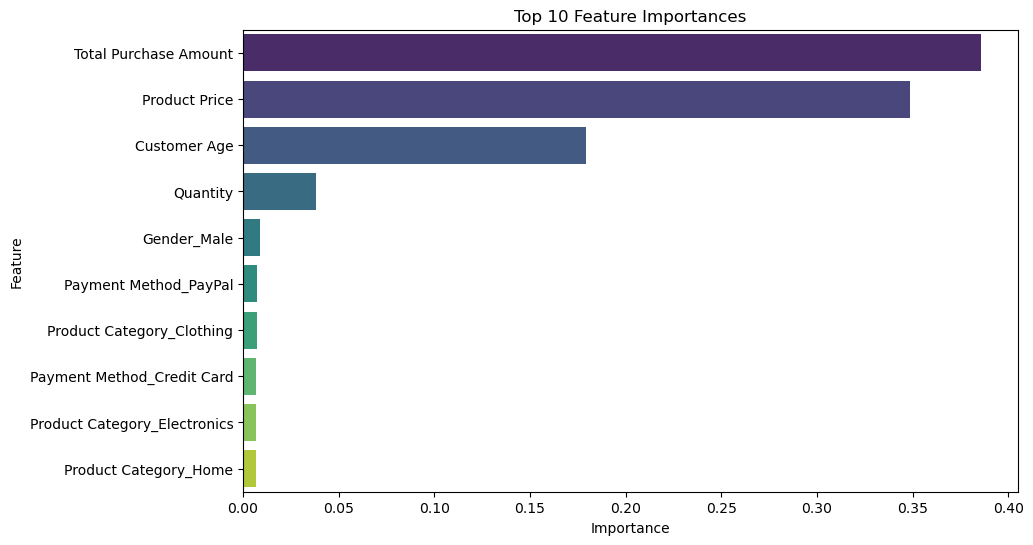

In [54]:
# Feature Importance

if isinstance(model2.named_steps['classifier'], RandomForestClassifier):
    feature_names = numeric_features + list(model2.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out(categorical_features))
    importances = model2.named_steps['classifier'].feature_importances_
    feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importances.head(10), palette='viridis')
    plt.title("Top 10 Feature Importances")

    plt.savefig('output/top10_features(churn).png')
    plt.show()

In [55]:
# Save the Trained model to a pickle file

pickle.dump(model2, open(os.path.join('Models', 'churn_randomforest.pkl'), 'wb'), protocol=4)

print("Model saved as 'churn_randomforest.pkl'")

Model saved as 'churn_randomforest.pkl'


## Model Training and Evaluation: Churn Prediction Using Multi-layer Perceptron (MLP)

In [56]:
# Importing new Dependencies

from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [57]:
# Duplicate the Dataframe to run the churn MLP model
df_churn_mlp = df_final.copy()

In [58]:
# Adding 'Gender' to the list of features
features = ['Total Purchase Amount', 'Customer Age', 'Returns', 'Gender']
target = 'Churn'

# Encoding the 'Gender' column using one-hot encoding to include both Female and Male
X = pd.get_dummies(df_churn_mlp[features], columns=['Gender'])  # This will add both Gender_Female and Gender_Male
y = df_churn_mlp[target]

In [59]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

# Create a StandardScaler instance and scale the data
scaler = StandardScaler()
X_scaler = scaler.fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [60]:
# Define the deep neural network model
nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=80, input_dim=len(X_train_scaled[0]), activation='relu'))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=30, activation='relu'))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [61]:
# Check the structure of the model
nn.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 80)             │           480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 30)             │         2,430 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,941 (11.49 KB)

 Trainable params: 2,941 (11.49 KB)

 Non-trainable params: 0 (0.00 B)

In [62]:
# Compile the model
nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [63]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, validation_split=0.15, epochs=50, verbose=1)

Epoch 1/50
8069/8069 ━━━━━━━━━━━━━━━━━━━━ 4s 389us/step - accuracy: 0.7966 - loss: 0.5052 - val_accuracy: 0.8007 - val_loss: 0.5002
Epoch 2/50
8069/8069 ━━━━━━━━━━━━━━━━━━━━ 3s 381us/step - accuracy: 0.7999 - loss: 0.5012 - val_accuracy: 0.8007 - val_loss: 0.5000
Epoch 3/50
8069/8069 ━━━━━━━━━━━━━━━━━━━━ 3s 377us/step - accuracy: 0.7997 - loss: 0.5014 - val_accuracy: 0.8007 - val_loss: 0.5003
Epoch 4/50
8069/8069 ━━━━━━━━━━━━━━━━━━━━ 3s 383us/step - accuracy: 0.8005 - loss: 0.5002 - val_accuracy: 0.8007 - val_loss: 0.5011
Epoch 5/50
8069/8069 ━━━━━━━━━━━━━━━━━━━━ 3s 384us/step - accuracy: 0.7991 - loss: 0.5018 - val_accuracy: 0.8007 - val_loss: 0.4998
Epoch 6/50
8069/8069 ━━━━━━━━━━━━━━━━━━━━ 3s 383us/step - accuracy: 0.7994 - loss: 0.5016 - val_accuracy: 0.8007 - val_loss: 0.5008
Epoch 7/50
8069/8069 ━━━━━━━━━━━━━━━━━━━━ 3s 379us/step - accuracy: 0.8001 - loss: 0.5005 - val_accuracy: 0.8007 - val_loss: 0.5000
Epoch 8/50
8069/8069 ━━━━━━━━━━━━━━━━━━━━ 3s 380us/step - accuracy: 0.7980 -

In [64]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

3165/3165 - 1s - 230us/step - accuracy: 0.7997 - loss: 0.5008
Loss: 0.5007738471031189, Accuracy: 0.7997452020645142


In [65]:
# Define the improved deep neural network model
nn_improved = tf.keras.models.Sequential()

In [66]:
# Input layer and first hidden layer with dropout
nn_improved.add(tf.keras.layers.Dense(units=100, input_dim=len(X_train_scaled[0]), activation='relu'))
# Dropout with 20% of neurons dropped
nn_improved.add(Dropout(0.2))

In [67]:
# Second hidden layer with dropout
nn_improved.add(tf.keras.layers.Dense(units=50, activation='relu'))
nn_improved.add(Dropout(0.2))  # Dropout with 20% of neurons dropped
# Third hidden layer
nn_improved.add(tf.keras.layers.Dense(units=25, activation='relu'))

# Output layer
nn_improved.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [68]:
# Check the structure of the improved model
nn_improved.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 100)            │           600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,951 (27.15 KB)

 Trainable params: 6,951 (27.15 KB)

 Non-trainable params: 0 (0.00 B)

In [69]:
# Compile the improved model
nn_improved.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])

In [70]:
# Train the improved model
fit_model_improved = nn_improved.fit(X_train_scaled, y_train, validation_split=0.15, epochs=75, batch_size=32, verbose=1)

Epoch 1/75
8069/8069 ━━━━━━━━━━━━━━━━━━━━ 4s 450us/step - accuracy: 0.7979 - loss: 0.5073 - val_accuracy: 0.8007 - val_loss: 0.5005
Epoch 2/75
8069/8069 ━━━━━━━━━━━━━━━━━━━━ 4s 451us/step - accuracy: 0.7989 - loss: 0.5022 - val_accuracy: 0.8007 - val_loss: 0.4994
Epoch 3/75
8069/8069 ━━━━━━━━━━━━━━━━━━━━ 4s 513us/step - accuracy: 0.7992 - loss: 0.5017 - val_accuracy: 0.8007 - val_loss: 0.4995
Epoch 4/75
8069/8069 ━━━━━━━━━━━━━━━━━━━━ 4s 447us/step - accuracy: 0.7998 - loss: 0.5009 - val_accuracy: 0.8007 - val_loss: 0.4997
Epoch 5/75
8069/8069 ━━━━━━━━━━━━━━━━━━━━ 4s 442us/step - accuracy: 0.7987 - loss: 0.5025 - val_accuracy: 0.8007 - val_loss: 0.4993
Epoch 6/75
8069/8069 ━━━━━━━━━━━━━━━━━━━━ 4s 442us/step - accuracy: 0.8006 - loss: 0.4998 - val_accuracy: 0.8007 - val_loss: 0.4994
Epoch 7/75
8069/8069 ━━━━━━━━━━━━━━━━━━━━ 4s 439us/step - accuracy: 0.7995 - loss: 0.5012 - val_accuracy: 0.8007 - val_loss: 0.4994
Epoch 8/75
8069/8069 ━━━━━━━━━━━━━━━━━━━━ 4s 442us/step - accuracy: 0.7993 -

In [71]:
# Evaluate the improved model using the test data
model_loss_improved, model_accuracy_improved = nn_improved.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Improved Loss: {model_loss_improved}, Improved Accuracy: {model_accuracy_improved}")

3165/3165 - 1s - 230us/step - accuracy: 0.7997 - loss: 0.5008
Improved Loss: 0.500783383846283, Improved Accuracy: 0.7997452020645142


In [72]:
# Save the Trained model to a pickle file

pickle.dump(nn_improved, open(os.path.join('Models', 'churn_improved_mlp.pkl'), 'wb'), protocol=4)

print("Model saved as 'churn_improved_mlp.pkl'")

Model saved as 'churn_improved_mlp.pkl'


## Model Training and Evaluation: Revenue Forecasting Using Multi-layer Perceptron (MLP)

In [73]:
# Duplicate the Dataframe to run the revenue MLP model
df_final_mlp = df_final.copy()

In [74]:
# Verify the target column name

target_column = 'Total Purchase Amount'  # Update if the actual name differs
if target_column not in df_final_mlp.columns:
    raise KeyError(f"Column '{target_column}' not found in the dataset.")

In [75]:
# Drop irrelevant columns

irrelevant_columns = ['Customer Name', 'Purchase Date', 'Purchase Year', 'Purchase Month' 'Customer ID', 'Churn', 'Returns']
df_final_mlp.drop(columns=[col for col in irrelevant_columns if col in df_final_mlp.columns], inplace=True)

In [76]:
# Define features (X) and target (y)

X = df_final_mlp.drop(columns=[target_column])
y = df_final_mlp[target_column]

In [77]:
# Identify numeric and categorical columns after dropping the target column

numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

In [78]:
# Fill missing values for categorical columns with the mode (most frequent value)

for col in categorical_cols:
    df_final_mlp[col] = df_final_mlp[col].fillna(df_final_mlp[col].mode()[0])

In [79]:
# Identify numeric and categorical columns after dropping the target column

numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

In [80]:
# Split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [81]:
# Preprocessing pipeline

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),  # Scale numeric features
        ('cat', OneHotEncoder(drop='first'), categorical_cols)  # Encode categorical features
    ]
)

In [82]:
# Apply preprocessing to training and testing data

X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [83]:
# Build the Neural Network Model

model3 = Sequential([
    Dense(128, activation='relu', input_dim=X_train_processed.shape[1]),  # Input layer
    Dropout(0.2),  # Dropout for regularization
    Dense(64, activation='relu'),  # Hidden layer
    Dropout(0.2),  # Dropout for regularization
    Dense(1)  # Output layer for regression
])

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [84]:
# Compile the model

model3.compile(optimizer='adam', loss='mse', metrics=['mae'])  # Mean Squared Error as the loss function

In [85]:
# Train the model

history = model3.fit(
    X_train_processed, y_train,
    validation_data=(X_test_processed, y_test),
    epochs=50,  # Number of training iterations
    batch_size=32,  # Number of samples per batch
    verbose=1
)

Epoch 1/50
10126/10126 ━━━━━━━━━━━━━━━━━━━━ 6s 503us/step - loss: 2995011.0000 - mae: 1429.7924 - val_loss: 2094830.1250 - val_mae: 1252.5533
Epoch 2/50
10126/10126 ━━━━━━━━━━━━━━━━━━━━ 5s 455us/step - loss: 2149987.5000 - mae: 1261.9315 - val_loss: 2083380.1250 - val_mae: 1250.1937
Epoch 3/50
10126/10126 ━━━━━━━━━━━━━━━━━━━━ 5s 455us/step - loss: 2147709.5000 - mae: 1261.6860 - val_loss: 2083957.8750 - val_mae: 1250.2604
Epoch 4/50
10126/10126 ━━━━━━━━━━━━━━━━━━━━ 5s 450us/step - loss: 2143685.5000 - mae: 1260.2285 - val_loss: 2085336.3750 - val_mae: 1250.5476
Epoch 5/50
10126/10126 ━━━━━━━━━━━━━━━━━━━━ 5s 468us/step - loss: 2137216.5000 - mae: 1258.7002 - val_loss: 2085298.3750 - val_mae: 1250.4938
Epoch 6/50
10126/10126 ━━━━━━━━━━━━━━━━━━━━ 5s 522us/step - loss: 2146479.7500 - mae: 1262.2017 - val_loss: 2089235.1250 - val_mae: 1251.2817
Epoch 7/50
10126/10126 ━━━━━━━━━━━━━━━━━━━━ 5s 450us/step - loss: 2148110.0000 - mae: 1262.1948 - val_loss: 2082504.7500 - val_mae: 1249.9474
Epoch 

In [86]:
# Evaluate the model

train_loss, train_mae = model3.evaluate(X_train_processed, y_train, verbose=0)
test_loss, test_mae = model3.evaluate(X_test_processed, y_test, verbose=0)
print(f"Train Loss (MSE): {train_loss:.2f}, Train MAE: {train_mae:.2f}")
print(f"Test Loss (MSE): {test_loss:.2f}, Test MAE: {test_mae:.2f}")

Train Loss (MSE): 2072998.00, Train MAE: 1246.63
Test Loss (MSE): 2081539.88, Test MAE: 1249.56


In [87]:
# Make predictions

nn_preds = model3.predict(X_test_processed).flatten()

2532/2532 ━━━━━━━━━━━━━━━━━━━━ 1s 256us/step


In [88]:
# Evaluate Neural Network Performance

nn_mse = mean_squared_error(y_test, nn_preds)
nn_r2 = r2_score(y_test, nn_preds)
print("\nNeural Network Performance:")
print(f"Mean Squared Error: {nn_mse:.2f}")
print(f"R^2 Score: {nn_r2:.2f}")


Neural Network Performance:
Mean Squared Error: 2081539.51
R^2 Score: 0.00


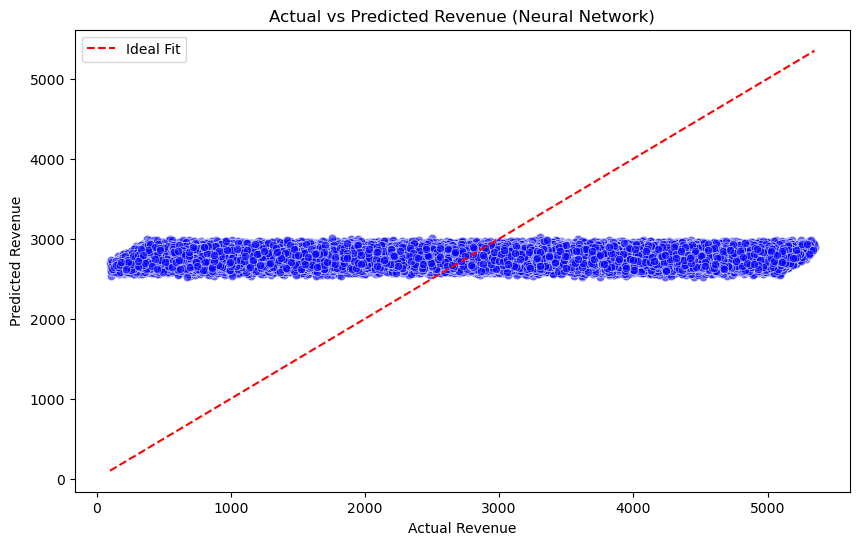

In [89]:
# Visualize the predictions vs. actual values for Neural Network

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=nn_preds, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Ideal Fit')
plt.title('Actual vs Predicted Revenue (Neural Network)')
plt.xlabel('Actual Revenue')
plt.ylabel('Predicted Revenue')
plt.legend()

plt.savefig('output/Revenue_prediction_vs_actual.png')
plt.show()

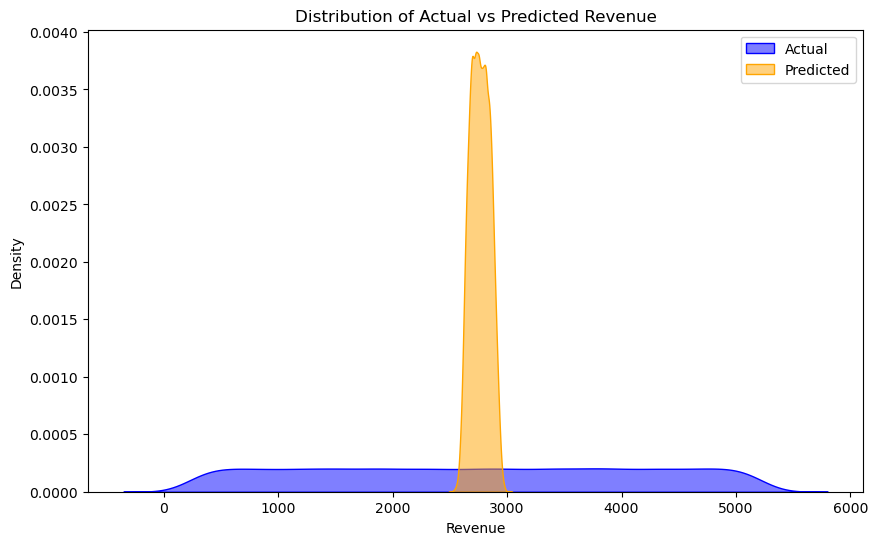

In [90]:
plt.figure(figsize=(10, 6))
sns.kdeplot(y_test, label='Actual', color='blue', fill=True, alpha=0.5)
sns.kdeplot(nn_preds, label='Predicted', color='orange', fill=True, alpha=0.5)
plt.title('Distribution of Actual vs Predicted Revenue')
plt.xlabel('Revenue')
plt.ylabel('Density')
plt.legend()

plt.savefig('output/Revenue_prediction_vs_actual(2).png')
plt.show()

<Figure size 1000x600 with 0 Axes>

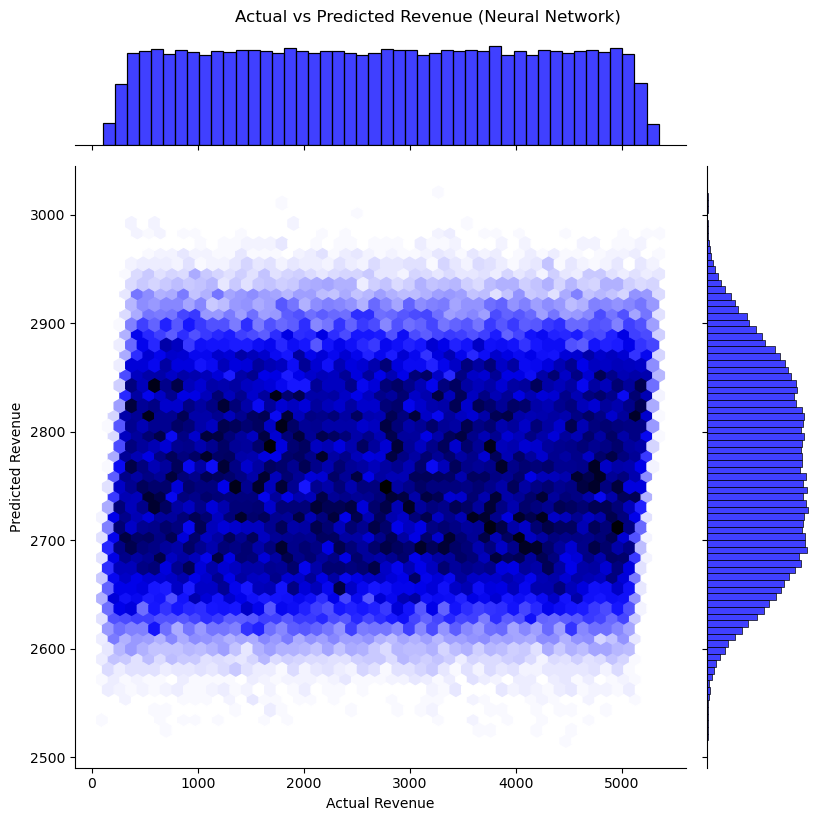

In [91]:
plt.figure(figsize=(10, 6))
sns.jointplot(x=y_test, y=nn_preds, kind="hex", height=8, color="blue")
plt.suptitle('Actual vs Predicted Revenue (Neural Network)', y=1.02)
plt.xlabel('Actual Revenue')
plt.ylabel('Predicted Revenue')

plt.savefig('output/Revenue_prediction_vs_actual(3).png')
plt.show()

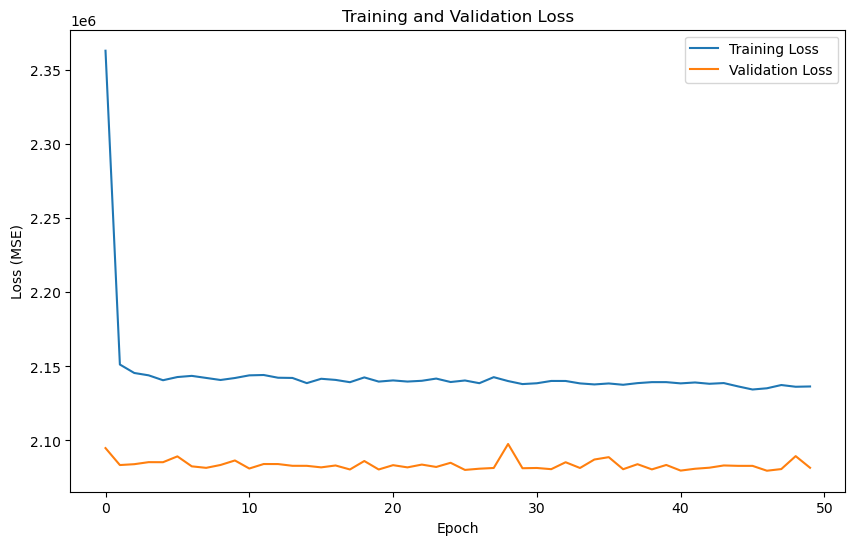

In [92]:
# Plot Training and Validation Loss

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()

plt.savefig('output/training_validation_loss.png')
plt.show()

In [93]:
# Save the Trained model to a pickle file

pickle.dump(model3, open(os.path.join('Models', 'revenue_mlp.pkl'), 'wb'), protocol=4)

print("Model saved as 'revenue_mlp.pkl'")

Model saved as 'revenue_mlp.pkl'
